# HOMEWORK8

This notebook shows, the tutorial showing the steps to use a spectral clustering algorithm.

# SPECTRAL CLUSTERING

Clustering in the context of machine learning is an unsupervised problem where you have to split "m" observations in "k" clusters.


 1.Points in the same cluster are very similar.                                                                  
 2.Points in different clusters are very different.

The goal of spectral clustering is to cluster data that is connected but not necessarily clustered within convex boundaries.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. 

# Importing required libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Data setup

The Data set in this algorithm is a set of points in the circles with given centers and radii. In a region of x-y plane from (0,0) to (100,100).

In [23]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

Adding circles to image

In [24]:
circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

img = circle1 + circle2 + circle3 + circle4

We need to mask the limits of the circles to separate from one another.

In [25]:
# we are interested in not separating the objects from the background
mask = img.astype(bool)
print mask
print
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)
print img

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]

[[ 1.47032318  1.19151784  1.04052704 ...,  0.80641777  0.70012293
   1.20477288]
 [ 1.13371951  1.11457666  1.20561829 ...,  0.96647739  0.97755119
   1.02148305]
 [ 0.90985751  0.82085518  1.04698492 ...,  1.30912603  0.98813403
   0.81740064]
 ..., 
 [ 1.18436567  0.81671042  1.19470599 ...,  1.26857653  0.86602359
   0.6002369 ]
 [ 0.74241001  0.89654804  1.20952601 ...,  1.01827397  1.06721431
   0.93479214]
 [ 1.10411287  1.01712507  0.8232398  ...,  1.20013476  0.75574398
   0.88275948]]


Converting the image into a graph

In [26]:
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
print labels
print
label_im = -np.ones(mask.shape)
label_im[mask] = labels
print label_im

[1 1 1 ..., 3 3 3]

[[-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 ..., 
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]]


Plotting images

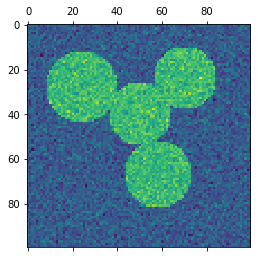

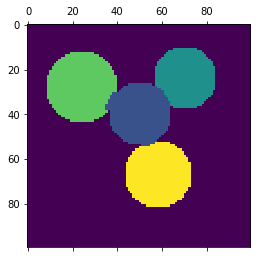

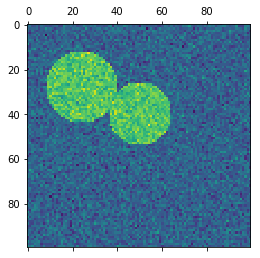

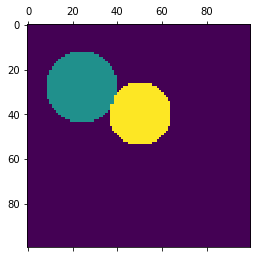

In [27]:
plt.matshow(img)
plt.matshow(label_im)

img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

The above output shows the segmentation of clusters from the given two input images with four circles.

# REFERENCES

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html                                        

https://www.quora.com/What-is-an-intuitive-explanation-of-spectral-clustering-in-the-context-of-machine-learning             

https://calculatedcontent.com/2012/10/09/spectral-clustering/                                                 

http://www.di.fc.ul.pt/~jpn/r/spectralclustering/spectralclustering.html                                                             